In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, TimeDistributed, Flatten
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from numpy import genfromtxt
import seaborn as sns

# Read in and shape data

In [5]:
input_file = '/Users/niall/Documents/Cypress_Code/Notebooks/flip_bits_dataset.csv'

my_data_flipped = genfromtxt(input_file, delimiter=',')
new_data = np.delete(my_data_flipped, (0), axis=0)

In [6]:
X2 = np.delete(new_data, (0,32), axis=1)

In [7]:
Y2 = new_data[:,32]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.25, random_state=42)

In [11]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(11625, 31)
(3875, 31)
(11625,)
(3875,)


In [12]:
X_train = np.array(X_train).reshape((np.shape(X_train)[0], 1, np.shape(X_train)[1]))
X_test = np.array(X_test).reshape((np.shape(X_test)[0], 1, np.shape(X_test)[1]))

# Build LSTM

In [13]:
num_neurons = 31
num_features = 31


model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

print("inputs: " , model.input_shape)
print("outputs: ", model.output_shape)
print("actual inputs: ", np.shape(X_train))
print("actual outputs: ", np.shape(y_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 31)             7812      
_________________________________________________________________
lstm_1 (LSTM)                (None, 31)                7812      
_________________________________________________________________
dense (Dense)                (None, 1)                 32        
Total params: 15,656
Trainable params: 15,656
Non-trainable params: 0
_________________________________________________________________
inputs:  (None, 1, 31)
outputs:  (None, 1)
actual inputs:  (11625, 1, 31)
actual outputs:  (11625,)


In [15]:
opt = SGD(lr=0.05)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [16]:
print('Training LSTM...')

batch_size = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)

Training LSTM...
Train on 11625 samples, validate on 3875 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
11625/11625 [==============================] - 10s 849us/sample - loss: 0.1468 - acc: 0.9684 - val_loss: 0.1187 - val_acc: 0.9646
Epoch 2/10
11625/11625 [==============================] - 9s 755us/sample - loss: 0.0431 - acc: 0.9855 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 3/10
11625/11625 [==============================] - 9s 749us/sample - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 1.0000
Epoch 4/10
11625/11625 [==============================] - 9s 768us/sample - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 5/10
11625/11625 [==============================] - 8s 721us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 6/10
11625/11625 [==============================] - 9s 760us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 7/10
11625/11625 [=====================

In [17]:
print('score:', score)
print('accuracy:', acc)

score: 0.0004905942542057845
accuracy: 1.0


## Model Predictions on test data 

In [18]:
y_pred = model.predict(X_test, batch_size=1)

In [20]:
pred_df = pd.DataFrame(y_pred, columns =['Y_pred']) 
pred_df['Label'] = y_test

In [21]:
y_pred_ref_ref = pred_df[pred_df['Label'] == 1]
y_pred_ref_ref.head()

,Y_pred,Label
54,0.994856,1.0
72,0.994856,1.0
84,0.994856,1.0
141,0.994856,1.0
154,0.994856,1.0


In [22]:
y_pred_non_ref = pred_df[pred_df['Label'] == 0]
y_pred_non_ref.head()

,Y_pred,Label
0,0.000156,0.0
1,0.000111,0.0
2,0.000157,0.0
3,0.000214,0.0
4,0.000175,0.0


## All Predictions

Text(0.5, 1.0, 'All y_preds flip_bits')

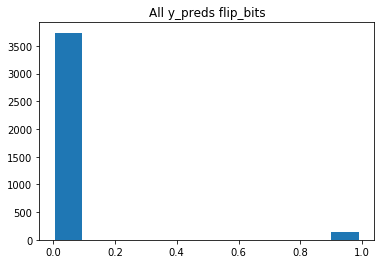

In [23]:
plt.hist(y_pred, rwidth=0.9)
plt.title('All y_preds flip_bits')

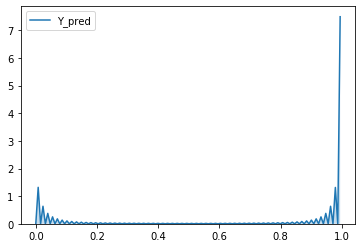

In [36]:
sns.kdeplot(pred_df['Y_pred'],shade=True)

## Ref Ref Predictions

Text(0.5, 1.0, 'Ref_Ref y_preds flip bits')

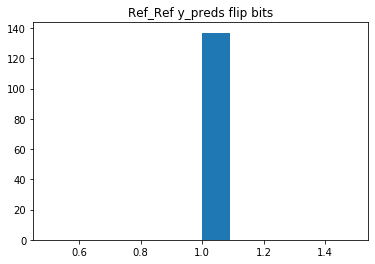

In [24]:
plt.hist(y_pred_ref_ref['Y_pred'], rwidth=0.9)
plt.title('Ref_Ref y_preds flip bits')

## Non Ref Ref Predictions

Text(0.5, 1.0, 'Not Ref_Ref y_preds flip_bits')

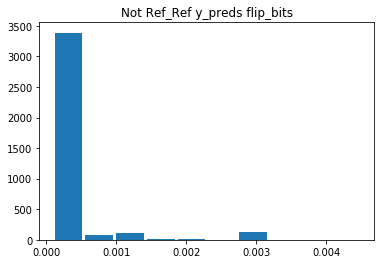

In [25]:
plt.hist(y_pred_non_ref['Y_pred'], rwidth=0.9)
plt.title('Not Ref_Ref y_preds flip_bits')

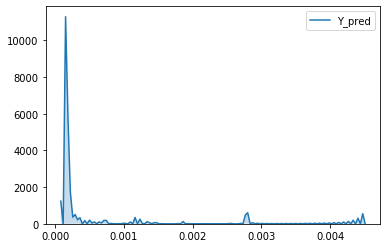

In [38]:
sns.kdeplot(y_pred_non_ref['Y_pred'],shade=True)